In [1]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [6]:
Simulation_Dataset_T18= {
    "2018": "../../../data/simulated_data_7years/T18/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/T18/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/T18/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/T18/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/T18/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/T18/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/T18/2024/Simulation_Outputs"   
}

Weather_Dataset_T18= {
    "2018": "../../../data/simulated_data_7years/T18/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/T18/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/T18/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/T18/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/T18/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/T18/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/T18/2024/Weather_Dataset.txt"   
}

Simulation_Dataset_T20= {
    "2018": "../../../data/simulated_data_7years/T20/2018/Simulation_Outputs",
    "2019": "../../../data/simulated_data_7years/T20/2019/Simulation_Outputs",
    "2020": "../../../data/simulated_data_7years/T20/2020/Simulation_Outputs",
    "2021": "../../../data/simulated_data_7years/T20/2021/Simulation_Outputs",
    "2022": "../../../data/simulated_data_7years/T20/2022/Simulation_Outputs",
    "2023": "../../../data/simulated_data_7years/T20/2023/Simulation_Outputs",
    "2024": "../../../data/simulated_data_7years/T20/2024/Simulation_Outputs"   
}

Weather_Dataset_T20= {
    "2018": "../../../data/simulated_data_7years/T20/2018/Weather_Dataset.txt",
    "2019": "../../../data/simulated_data_7years/T20/2019/Weather_Dataset.txt",
    "2020": "../../../data/simulated_data_7years/T20/2020/Weather_Dataset.txt",
    "2021": "../../../data/simulated_data_7years/T20/2021/Weather_Dataset.txt",
    "2022": "../../../data/simulated_data_7years/T20/2022/Weather_Dataset.txt",
    "2023": "../../../data/simulated_data_7years/T20/2023/Weather_Dataset.txt",
    "2024": "../../../data/simulated_data_7years/T20/2024/Weather_Dataset.txt"   
}


In [13]:
consommation_chauffage_T18 = extract_and_concat_consommation(Simulation_Dataset_T18, column_index=4, prefix="consommation_heat_T18")
consommation_chauffage_T20 = extract_and_concat_consommation(Simulation_Dataset_T20, column_index=4, prefix="consommation_heat_T20")

city_groups = {
    "Weather_Dataset": Weather_Dataset_T18  
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "ray_": 7,
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)
Text_combined_T18 = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined_T18 = combined_data.get('Hum_combined_Weather_Dataset')
ray_combined_T18 = combined_data.get('ray_combined_Weather_Dataset')   
occupation=pd.read_csv("../../../data/simulated_data_7years/T18/Occupancy_per_hour",delimiter='\t')
occ_df_T18 = pd.DataFrame(occupation["RealOCCUP                "].values[:8760].reshape(-1, 24))
occupation_7years_T18 = pd.concat([occ_df_T18] * 7, ignore_index=True)


city_groups = {
    "Weather_Dataset": Weather_Dataset_T20  
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "ray_": 7,
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)
Text_combined_T20  = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined_T20  = combined_data.get('Hum_combined_Weather_Dataset')
ray_combined_T20  = combined_data.get('ray_combined_Weather_Dataset')   
occupation=pd.read_csv("../../../data/simulated_data_7years/T20/Occupancy_per_hour",delimiter='\t')
occ_df_T20  = pd.DataFrame(occupation["RealOCCUP                "].values[:8760].reshape(-1, 24))
occupation_7years_T20  = pd.concat([occ_df_T20 ] * 7, ignore_index=True)

In [15]:
clustering_heat_T18=pd.read_csv("../../../data/simulated_data_7years/result_data/clustering_valeur exact_heat_T18_data_from_1_novembre_to_31_avril.csv")
clustering_heat_T20=pd.read_csv("../../../data/simulated_data_7years/result_data/clustering_valeur exact_heat_T20_data_from_1_novembre_to_31_avril.csv")

In [17]:
# Pour T18
start_date = "2018-01-01"
dates_T18 = pd.date_range(start=start_date, periods=len(Text_combined_T18), freq="D") 

Text_combined_T18.insert(0, "Date", dates_T18)
Hum_combined_T18.insert(0, "Date", dates_T18)
ray_combined_T18.insert(0, "Date", dates_T18)
occupation_7years_T18.insert(0, "Date", dates_T18)

add_heating_season(Text_combined_T18)
add_heating_season(Hum_combined_T18)
add_heating_season(ray_combined_T18)
add_heating_season(occupation_7years_T18)

df_Text_T18 = Text_combined_T18[Text_combined_T18["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_Hum_T18 = Hum_combined_T18[Hum_combined_T18["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_occ_T18 = occupation_7years_T18[occupation_7years_T18["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_ray_T18 = ray_combined_T18[ray_combined_T18["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)


# Pour T20
dates_T20 = pd.date_range(start=start_date, periods=len(Text_combined_T20), freq="D") 

Text_combined_T20.insert(0, "Date", dates_T20)
Hum_combined_T20.insert(0, "Date", dates_T20)
ray_combined_T20.insert(0, "Date", dates_T20)
occupation_7years_T20.insert(0, "Date", dates_T20)

add_heating_season(Text_combined_T20)
add_heating_season(Hum_combined_T20)
add_heating_season(ray_combined_T20)
add_heating_season(occupation_7years_T20)

df_Text_T20 = Text_combined_T20[Text_combined_T20["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_Hum_T20 = Hum_combined_T20[Hum_combined_T20["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_occ_T20 = occupation_7years_T20[occupation_7years_T20["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)
df_ray_T20 = ray_combined_T20[ray_combined_T20["heat"] == 1].drop(columns=["heat"]).copy().reset_index(drop=True)


In [18]:
df_Text_T20

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,14.290,12.995,11.430,10.350,9.955,10.115,10.080,9.875,9.740,9.695
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,12.905,13.140,13.225,13.055,12.945,13.215,13.515,13.560,13.555,13.675
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,15.995,15.965,15.585,14.830,14.145,13.705,13.270,12.950,12.925,13.190
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,17.960,17.720,17.085,15.990,14.390,13.095,12.725,13.040,12.810,12.335
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,15.950,15.425,14.475,13.225,12.145,11.430,10.940,10.560,10.225,9.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,8.645,9.515,9.775,9.115,7.860,6.700,5.365,4.310,4.000,3.610
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,10.260,11.510,11.910,10.490,7.680,5.625,4.505,3.650,2.930,1.945
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,11.305,12.715,12.940,11.280,7.770,4.745,3.640,3.045,2.060,1.485
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,5.275,5.725,5.830,5.495,4.510,3.485,2.990,2.635,2.220,1.900


In [19]:
# Pour T18
df_occ_T18 = df_occ_T18.drop(columns=["Date"])
df_Hum_T18 = df_Hum_T18.drop(columns=["Date"])
df_ray_T18 = df_ray_T18.drop(columns=["Date"])

df_combined_T18 = pd.concat([df_Text_T18, df_Hum_T18, df_occ_T18, df_ray_T18], axis=1)


# Pour T20
df_occ_T20 = df_occ_T20.drop(columns=["Date"])
df_Hum_T20 = df_Hum_T20.drop(columns=["Date"])
df_ray_T20 = df_ray_T20.drop(columns=["Date"])

df_combined_T20 = pd.concat([df_Text_T20, df_Hum_T20, df_occ_T20, df_ray_T20], axis=1)


In [20]:
df_combined_T18

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,449.581011,200.764985,79.889476,3.662093,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,264.277133,63.422252,26.470841,1.827115,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,383.859252,623.991615,342.485410,3.661866,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,2509.650465,1901.783552,1193.462926,5.503813,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,926.062950,283.901742,177.872902,1.827181,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,2792.940702,2441.793725,1790.785604,755.219054,0.0,0.0,0.0,0.0,0.0,0.0
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,3005.472373,2599.840785,1893.613239,805.246153,0.0,0.0,0.0,0.0,0.0,0.0
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,2964.035052,2572.253538,1874.730237,817.474865,0.0,0.0,0.0,0.0,0.0,0.0
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,1129.899090,993.456080,764.459429,544.143012,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_combined_T18['Date'] = pd.to_datetime(df_combined_T18['Date'])
clustering_heat_T18['Date'] = pd.to_datetime(clustering_heat_T18['Date'])

df_combined_T20['Date'] = pd.to_datetime(df_combined_T20['Date'])
clustering_heat_T20['Date'] = pd.to_datetime(clustering_heat_T20['Date'])

# Merge pour T18
df_combined_T18 = df_combined_T18.merge(
    clustering_heat_T18[['Date', 'heat_on', 'clusters_1', 'cluster_reel']],
    on='Date',
    how='inner'
)

# Merge pour T20
df_combined_T20 = df_combined_T20.merge(
    clustering_heat_T20[['Date', 'heat_on', 'clusters_1', 'cluster_reel']],
    on='Date',
    how='inner'
)

In [23]:
df_combined_T20

,Date,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,heat_on,clusters_1,cluster_reel
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,3.662093,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879...."
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,1.827115,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879...."
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,3.661866,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[165.93487007943926, 241.9876195966906, 332.52..."
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,5.503813,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[165.93487007943926, 241.9876195966906, 332.52..."
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,1.827181,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,"[165.93487007943926, 241.9876195966906, 332.52..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,755.219054,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879...."
1263,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,805.246153,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879...."
1264,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,817.474865,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"[1541.6499511472148, 1722.6154008280046, 1879...."
1265,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,544.143012,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,"[2321.288624854183, 2467.3013234223213, 2578.2..."



Évaluation de Random Forest...


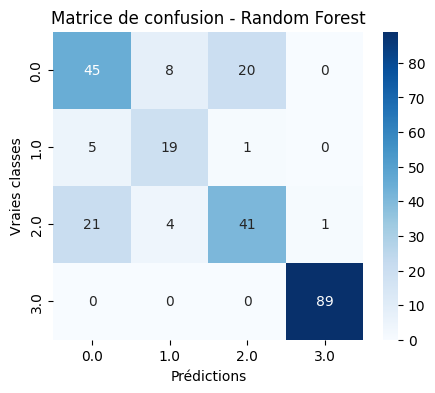

Random Forest - F1: 0.7625 - Accuracy: 0.7638 - Temps: 0.71s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


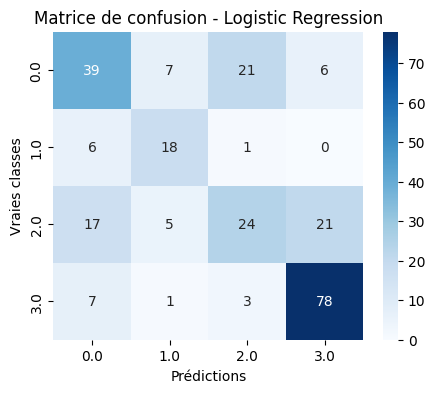

Logistic Regression - F1: 0.6121 - Accuracy: 0.6260 - Temps: 2.06s
###################################################################

Évaluation de SVC...


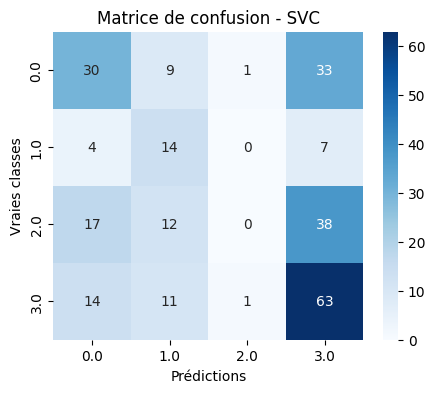

SVC - F1: 0.3557 - Accuracy: 0.4213 - Temps: 0.29s
###################################################################

Évaluation de KNN...


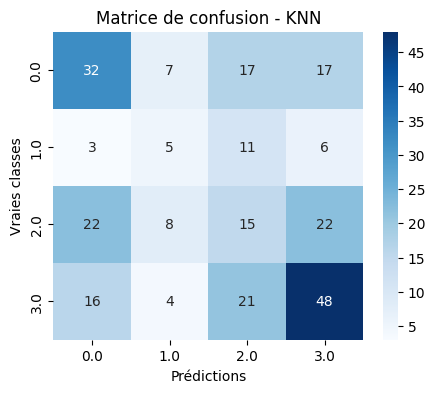

KNN - F1: 0.3913 - Accuracy: 0.3937 - Temps: 0.50s
###################################################################

Évaluation de Gradient Boosting...


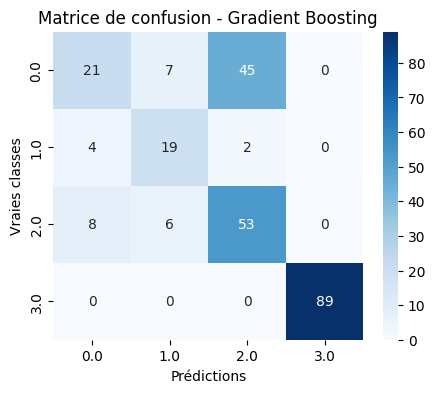

Gradient Boosting - F1: 0.6973 - Accuracy: 0.7165 - Temps: 11.57s
###################################################################

Évaluation de Random Forest...


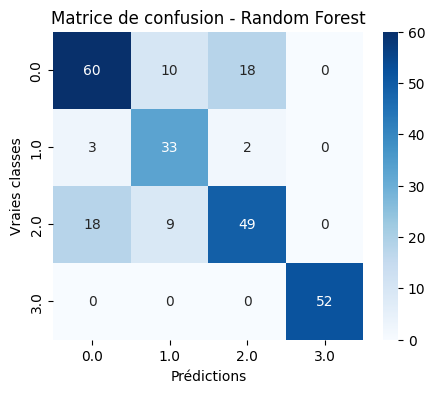

Random Forest - F1: 0.7627 - Accuracy: 0.7638 - Temps: 0.84s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


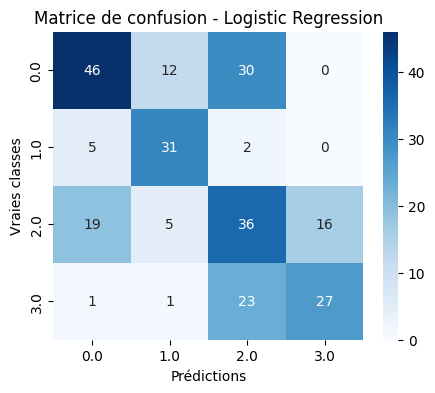

Logistic Regression - F1: 0.5525 - Accuracy: 0.5512 - Temps: 1.34s
###################################################################

Évaluation de SVC...


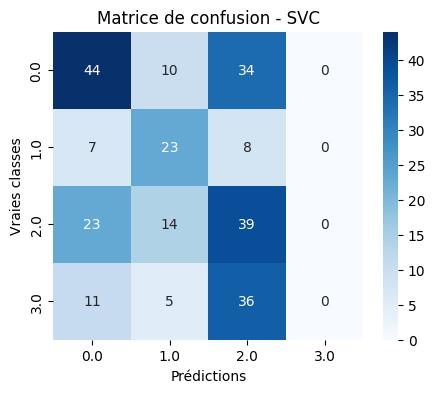

SVC - F1: 0.3736 - Accuracy: 0.4173 - Temps: 0.19s
###################################################################

Évaluation de KNN...


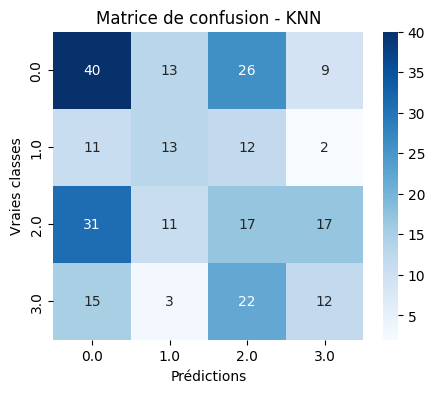

KNN - F1: 0.3196 - Accuracy: 0.3228 - Temps: 0.05s
###################################################################

Évaluation de Gradient Boosting...


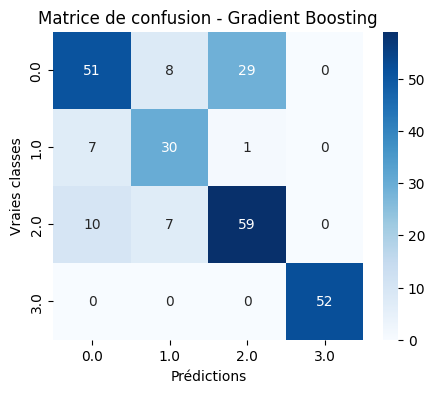

Gradient Boosting - F1: 0.7534 - Accuracy: 0.7559 - Temps: 11.18s
###################################################################


In [24]:
# Pour T18
df_combined_T18.columns = df_combined_T18.columns.astype(str)

re_T18, Test_Text_heat_toulouse_T18 = evaluate_models_split(
    df=df_combined_T18.drop(columns=["Date", "cluster_reel"]),
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

# Pour T20
df_combined_T20.columns = df_combined_T20.columns.astype(str)

re_T20, Test_Text_heat_toulouse_T20 = evaluate_models_split(
    df=df_combined_T20.drop(columns=["Date", "cluster_reel"]),
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)


## Remplacement des profils réels par les profils prédits

Pour la partie test (les 20% dernières données), nous remplaçons les profils de consommation réels par les profils prédits générés par le meilleur modèle de régression logistique (`y_pred_Logistic Regression_clusters_1`). 


Cela simule un scénario réaliste où seules les données historiques jusqu'à la partie test sont observées, et où les prédictions de 24 heures sont réalisées sur des profils non observés, basées sur les résultats du modèle.


In [26]:
# Pour T18
n_T18 = len(df_combined_T18)
cutoff_T18 = int(n_T18 * 0.8)

assert len(Test_Text_heat_toulouse_T18) == n_T18 - cutoff_T18, "Les tailles ne correspondent pas pour T18 !"

new_cluster_1_T18 = df_combined_T18['clusters_1'].copy()
new_cluster_1_T18.iloc[cutoff_T18:] = Test_Text_heat_toulouse_T18['y_pred_Logistic Regression_clusters_1'].values
df_combined_T18['clusters_1'] = new_cluster_1_T18

# Pour T20
n_T20 = len(df_combined_T20)
cutoff_T20 = int(n_T20 * 0.8)

assert len(Test_Text_heat_toulouse_T20) == n_T20 - cutoff_T20, "Les tailles ne correspondent pas pour T20 !"

new_cluster_1_T20 = df_combined_T20['clusters_1'].copy()
new_cluster_1_T20.iloc[cutoff_T20:] = Test_Text_heat_toulouse_T20['y_pred_Logistic Regression_clusters_1'].values
df_combined_T20['clusters_1'] = new_cluster_1_T20


In [27]:
df_combined_T18.to_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_Humidite_Ray_T18_data_from_1_novembre_to_31_avril.csv", index=False)
df_combined_T20.to_csv("../../../data/simulated_data_7years/result_data/profile_prediction_valeurexact_Text_Occupation_Humidite_Ray_T20_data_from_1_novembre_to_31_avril.csv", index=False)

